1. Find the best and worst cases for the Gale-Shapley and Irving ( An Efficient Algorithm for the “Stable Roommates” Problem) Algorithms and run in Colab these algorithms for those cases for n=4 and 40.


###Gale–Shapley algorithm

In [153]:
import random

def generate_prefs(n):
    men_prefs  = []
    women_prefs = []

    for _ in range(n):
        men_list = list(range(n))
        random.shuffle(men_list)
        men_prefs.append(men_list)

        women_list = list(range(n))
        random.shuffle(women_list)
        women_prefs.append(women_list)

    return men_prefs, women_prefs


In [37]:
def gale_shapley(men_prefs, women_prefs):
    n = len(men_prefs)
    women_match = [-1] * n
    men_free = list(range(n))

    while men_free:
        man = men_free.pop(0)
        woman = men_prefs[man].pop(0)

        if women_match[woman] == -1:
            women_match[woman] = man
        else:
            current_man = women_match[woman]
            if women_prefs[woman].index(man) < women_prefs[woman].index(current_man):
                women_match[woman] = man
                men_free.append(current_man)
            else:
                men_free.append(man)

    return women_match

In [39]:
men_prefs1, women_prefs1 = generate_prefs(4)
print("n = 4")
r1 = gale_shapley(men_prefs1,women_prefs1)
print(r1)

men_prefs2, women_prefs2 = generate_prefs(40)
print("n = 40")
r2 = gale_shapley(men_prefs2,women_prefs2)
print(r2)


n = 4
[3, 0, 1, 2]
n = 40
[10, 5, 32, 36, 4, 25, 37, 1, 17, 0, 16, 28, 26, 11, 39, 21, 8, 20, 31, 12, 35, 9, 27, 24, 18, 22, 15, 2, 29, 14, 23, 6, 34, 33, 3, 38, 13, 7, 19, 30]


###Irving Algorithm

In [20]:
import random
def generate_prefs_roommates(n):
    roommates_prefs  = []

    for i in range(n):
        roommates_list = list(range(n))
        random.shuffle(roommates_list)
        roommates_list.remove(i)
        roommates_prefs.append(roommates_list)



    return roommates_prefs

In [38]:
def stable_roommates(preferences):
    n = len(preferences)
    engaged = [None] * n
    next_index = [0] * n
    inverse_preferences = [{} for _ in range(n)]

    for i, prefs in enumerate(preferences):
        inverse_preferences[i] = dict((pref, j) for j, pref in enumerate(prefs))

    while None in engaged:
        proposer = engaged.index(None)
        receiver = preferences[proposer][next_index[proposer]]
        next_index[proposer] += 1

        if engaged[receiver] is None:
            engaged[receiver] = proposer
            engaged[proposer] = receiver
        else:
            current_partner = engaged[receiver]
            if inverse_preferences[receiver][proposer] < inverse_preferences[receiver][current_partner]:
                engaged[receiver] = proposer
                engaged[proposer] = receiver
                engaged[current_partner] = None

    return engaged




In [40]:
prefs_roommates1 = generate_prefs_roommates(4)
print("With n = 4")
res1=stable_roommates(prefs_roommates1)
print(res1)

prefs_roommates2 = generate_prefs_roommates(40)
print("With n = 40")
res2=stable_roommates(prefs_roommates2)
print(res2)



With n = 4
[3, 2, 1, 0]
With n = 40
[33, 34, 18, 25, 38, 36, 16, 37, 10, 31, 8, 24, 35, 17, 29, 30, 6, 13, 2, 22, 28, 32, 19, 26, 11, 3, 23, 39, 20, 14, 15, 9, 21, 0, 1, 12, 5, 7, 4, 27]


## 2. Run the Gale-Shapley Algorithm 100 times using random permutations as preference lists for n=4 and 40. Find the minimum, maximum and average number of iterations and plot the distribution of the number of iterations.

In [58]:
def gale_shapley(men_prefs, women_prefs):
    n = len(men_prefs)
    women_match = [-1] * n
    men_free = list(range(n))

    num_iterations=0

    while men_free:
        man = men_free.pop(0)
        woman = men_prefs[man].pop(0)


        if women_match[woman] == -1:
            women_match[woman] = man
            num_iterations+=1
        else:
            current_man = women_match[woman]
            if women_prefs[woman].index(man) < women_prefs[woman].index(current_man):
                women_match[woman] = man
                men_free.append(current_man)
                num_iterations+=1
            else:
                men_free.append(man)
                num_iterations+=1


    return num_iterations

For n=4:
Minimum iterations: 4
Maximum iterations: 11
Average iterations: 6.75


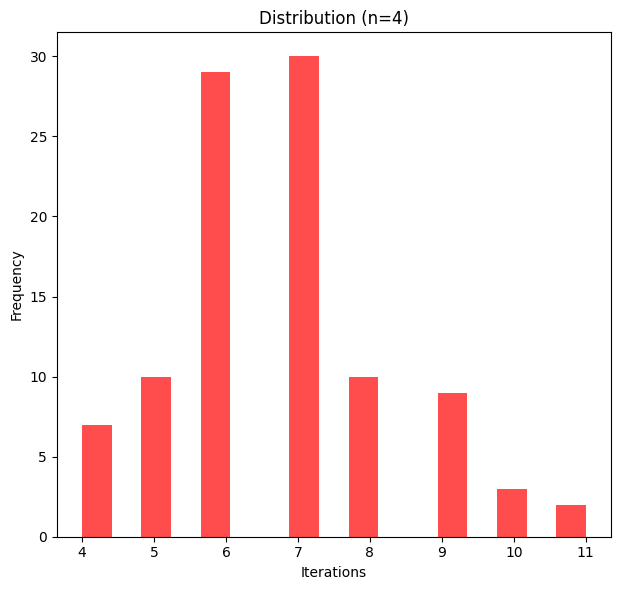

In [63]:
import numpy as np
import matplotlib.pyplot as plt

all_iterations_4 = []
min_iterations_4 = float('inf')
max_iterations_4 = 0
total_iterations_4 = 0

# For n=4
for i in range(100):
  men_pref = [np.random.permutation(4).tolist() for i in range(4)]
  women_pref = [np.random.permutation(4).tolist() for _ in range(4)]
  iterations = gale_shapley(men_pref, women_pref)
  all_iterations_4.append(iterations)

min_iterations_4 = min(all_iterations_4)
max_iterations_4 = max(all_iterations_4)
total_iterations_4 += sum(all_iterations_4)

avg_iterations_4 = total_iterations_4 / (100)

# Results
print("For n=4:")
print(f"Minimum iterations: {min_iterations_4}")
print(f"Maximum iterations: {max_iterations_4}")
print(f"Average iterations: {avg_iterations_4}")

plt.figure(figsize=(12, 6))

plt.hist(all_iterations_4, bins='auto', alpha=0.7, color='red')
plt.title('Distribution (n=4)')
plt.xlabel('Iterations')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



For n=4:
Minimum iterations: 68
Maximum iterations: 278
Average iterations: 158.56


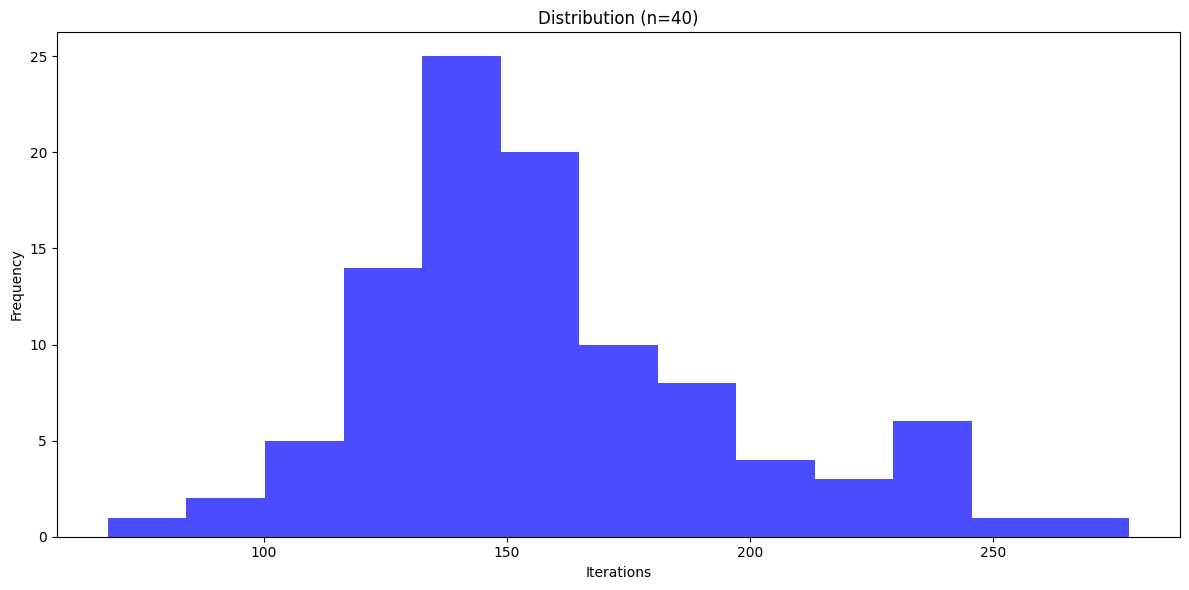

In [111]:
import numpy as np
import matplotlib.pyplot as plt

all_iterations_40 = []
min_iterations_40 = float('inf')
max_iterations_40 = 0
total_iterations_40 = 0

# For n=40
for i in range(100):
  men_pref = [np.random.permutation(40).tolist() for i in range(40)]
  women_pref = [np.random.permutation(40).tolist() for _ in range(40)]
  iterations = gale_shapley(men_pref, women_pref)
  all_iterations_40.append(iterations)

min_iterations_40 = min(all_iterations_40)
max_iterations_40 = max(all_iterations_40)
total_iterations_40 += sum(all_iterations_40)

avg_iterations_40 = total_iterations_40 / (100)

# Results
print("For n=4:")
print(f"Minimum iterations: {min_iterations_40}")
print(f"Maximum iterations: {max_iterations_40}")
print(f"Average iterations: {avg_iterations_40}")

plt.figure(figsize=(12, 6))

plt.hist(all_iterations_40, bins='auto', alpha=0.7, color='blue')
plt.title('Distribution (n=40)')
plt.xlabel('Iterations')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()




## 3. Simulate the Gale-Shapley algorithm using random preference lists , for n=4 and 40 and generate a gift animation

In [160]:
import random

def generate_prefs_gif_Gale(n):
    men_prefs  = []
    women_prefs = []

    for _ in range(n):
        men_list = list(range(n))
        random.shuffle(men_list)
        men_prefs.append(men_list)

        women_list = list(range(n))
        random.shuffle(women_list)
        women_prefs.append(women_list)

    return men_prefs, women_prefs

In [ ]:
from PIL import Image, ImageDraw



def gale_shapley(men_prefs, women_prefs):
    n = len(men_prefs)
    women_match = [-1] * n
    men_free = list(range(n))

    while men_free:
        man = men_free.pop(0)
        woman = men_prefs[man].pop(0)

        if women_match[woman] == -1:
            women_match[woman] = man
        else:
            current_man = women_match[woman]
            if women_prefs[woman].index(man) < women_prefs[woman].index(current_man):
                women_match[woman] = man
                men_free.append(current_man)
            else:
                men_free.append(man)

        yield women_match.copy()

def draw_frame(frame, men_prefs, women_prefs):
    n = len(frame)
    img_width = max(400, n * 120)
    img = Image.new("RGB", (img_width, 300), "white")
    draw = ImageDraw.Draw(img)

    for woman, man in enumerate(frame):
        draw.text((50 + woman * 120, 150), f"Woman {woman}", fill="black")
        if man != -1:
            draw.text((50 + woman * 120, 170), f"Man {man}", fill="black")
        else:
            draw.text((50 + woman * 120, 170), "Not matched", fill="black")

    return img

# Ejemplo de preferencias

men_prefs_g1, women_prefs_g1 = generate_prefs_gif_Gale(4)

frames = list(gale_shapley(men_prefs_g1,  women_prefs_g1))



In [197]:
import imageio
imageio.mimsave('gale_shapley1.gif', [draw_frame(frame, men_prefs_g1, women_prefs_g1) for frame in frames], fps=1, loop=0)

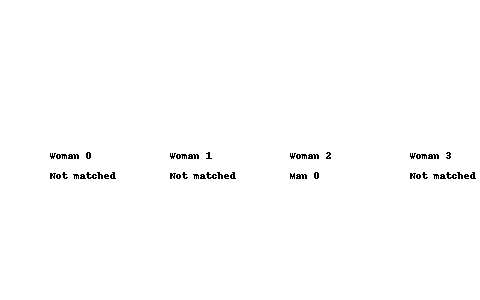

In [198]:
from IPython.display import display, Image

# Muestra el GIF directamente en la celda
display(Image(filename='gale_shapley1.gif'))

In [207]:
men_prefs_g2, women_prefs_g2 = generate_prefs_gif_Gale(40)

frames1 = list(gale_shapley(men_prefs_g2,  women_prefs_g2))

imageio.mimsave('gale_shapley2.gif', [draw_frame(frame, men_prefs_g2, women_prefs_g2) for frame in frames1], fps=1, loop=0)

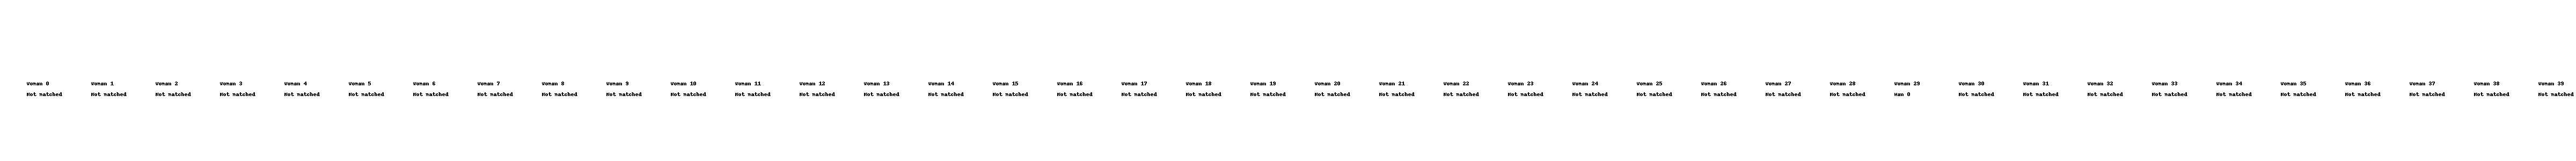

In [208]:
from IPython.display import display, Image

# Muestra el GIF directamente en la celda
display(Image(filename='gale_shapley2.gif'))

## 4. Simulate the Irving algorithm using random preference lists , for n=4 and 40 and generate a gift animation

In [210]:
import random
def generate_prefs_roommates(n):
    roommates_prefs  = []

    for i in range(n):
        roommates_list = list(range(n))
        random.shuffle(roommates_list)
        roommates_list.remove(i)
        roommates_prefs.append(roommates_list)



    return roommates_prefs

In [234]:
from PIL import Image, ImageDraw
import itertools

def stable_roommates(preferences):
    n = len(preferences)
    engaged = [None] * n
    next_index = [0] * n
    inverse_preferences = [{} for _ in range(n)]

    for i, prefs in enumerate(preferences):
        inverse_preferences[i] = dict((pref, j) for j, pref in enumerate(prefs))

    while None in engaged:
        proposer = engaged.index(None)
        receiver = preferences[proposer][next_index[proposer]]
        next_index[proposer] += 1

        if engaged[receiver] is None:
            engaged[receiver] = proposer
            engaged[proposer] = receiver
        else:
            current_partner = engaged[receiver]
            if inverse_preferences[receiver][proposer] < inverse_preferences[receiver][current_partner]:
                engaged[receiver] = proposer
                engaged[proposer] = receiver
                engaged[current_partner] = None

        yield engaged.copy()

def draw_frame_stable_roommates(frame, preferences):
    n = len(preferences)
    img_width = max(400, n * 120)
    img = Image.new("RGB", (img_width, 300), "white")
    draw = ImageDraw.Draw(img)

    for i, partner in enumerate(frame):
        draw.text((50 + i * 120, 150), f"Person {i}", fill="black")
        if partner is not None:
            draw.text((50 + i * 120, 170), f"Partner {partner}", fill="black")

    return img

# Ejemplo de preferencias para cualquier n
preferences_sr_4 = generate_prefs_roommates(4)


frames_sr = list(stable_roommates(preferences_sr_4))




In [230]:
import imageio
imageio.mimsave('stable_roommates.gif', [draw_frame_stable_roommates(frame_sr, preferences_sr_4) for frame_sr in frames_sr], fps=1, loop=0)

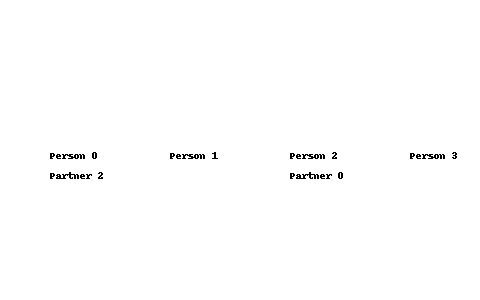

In [231]:
from IPython.display import display, Image

# Muestra el GIF directamente en la celda
display(Image(filename='stable_roommates.gif'))

In [232]:
preferences_sr_40 = generate_prefs_roommates(40)


frames_sr_40 = list(stable_roommates(preferences_sr_40))

In [235]:
import imageio
imageio.mimsave('stable_roommates_40.gif', [draw_frame_stable_roommates(frame_sr, preferences_sr_40) for frame_sr in frames_sr_40], fps=1, loop=0)

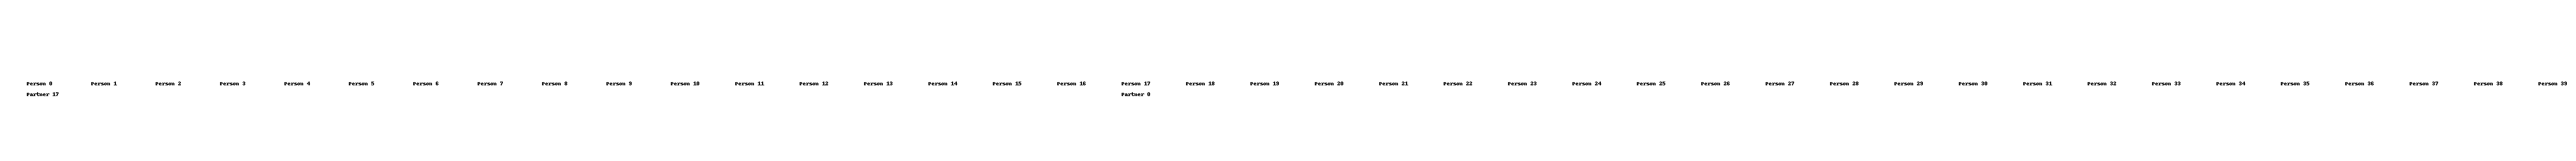

In [236]:
from IPython.display import display, Image

# Muestra el GIF directamente en la celda
display(Image(filename='stable_roommates_40.gif'))